5강. 의미 연결망 분석
=====

## Mecab 라이브러리 불러오기
Colab 환경에 Mecab 라이브러리를 설치합니다.</br>
GitHub에서 소스코드를 받아오는 식으로 설치할 수 있습니다.</br>
Mecab 라이브러리의 장점은 속도가 빠르고 사용자 사전을 구축하기 편리하다는 것입니다!

In [ ]:
# 한글 폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

# 설치 후 런타임을 다시 시작합니다.
# 상단 메뉴 '런타임' > '런타임 다시 시작'

In [ ]:
! git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git

Cloning into 'Mecab-ko-for-Google-Colab'...
remote: Enumerating objects: 122, done.
remote: Counting objects: 100% (31/31), done.
remote: Compressing objects: 100% (27/27), done.
remote: Total 122 (delta 15), reused 10 (delta 3), pack-reused 91
Receiving objects: 100% (122/122), 1.27 MiB | 7.49 MiB/s, done.
Resolving deltas: 100% (54/54), done.


In [ ]:
cd Mecab-ko-for-Google-Colab

/content/Mecab-ko-for-Google-Colab


In [ ]:
!bash install_mecab-ko_on_colab_light_220429.sh

Installing konlpy.....
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 53.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.3/465.3 kB 39.2 MB/s eta 0:00:00
Done
Installing mecab-0.996-ko-0.9.2.tar.gz.....
from https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
--2023-06-03 03:04:12--  https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
Resolving bitbucket.org (bitbucket.org)... 104.192.141.1, 2406:da00:ff00::3403:4be7, 2406:da00:ff00::22e9:9f55, ...
Connecting to bitbucket.org (bitbucket.org)|104.192.141.1|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://bbuseruploads.s3.amazonaws.com/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz?response-content-disposition=attachment%3B%20filename%3D%22mecab-0.996-ko-0.9.2.tar.gz%22&response-content-encoding=None&AWSAccessKeyId=

In [ ]:
cd /content/mecab-ko-dic-2.1.1-20180720

/content/mecab-ko-dic-2.1.1-20180720


In [ ]:
!pip install jamo

from jamo import h2j, j2hcj
def get_jongsung_TF(sample_text):
    sample_text_list = list(sample_text)
    last_word = sample_text_list[-1]
    last_word_jamo_list = list(j2hcj(h2j(last_word)))
    last_jamo = last_word_jamo_list[-1]

    jongsung_TF = "T"

    if last_jamo in ['ㅏ', 'ㅑ', 'ㅓ', 'ㅕ', 'ㅗ', 'ㅛ', 'ㅜ', 'ㅠ', 'ㅡ', 'ㅣ', 'ㅘ', 'ㅚ', 'ㅙ', 'ㅝ', 'ㅞ', 'ㅢ', 'ㅐ,ㅔ', 'ㅟ', 'ㅖ', 'ㅒ']:
        jongsung_TF = "F"

    return jongsung_TF

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
def make_user_dic_csv(morpheme_type, word_list, user_dic_file_name):
  file_data = []

  for word, score in word_list:
    jongsung_TF = get_jongsung_TF(word)

    line = f"{word},,,{score},{morpheme_type},*,{jongsung_TF},{word},*,*,*,*,*\n"

    file_data.append(line)

  with open("./user-dic/user-nnp.csv", 'w', encoding='utf-8') as f:
    for line in file_data:
      f.write(line)

In [ ]:
word_list = [('최민정', 0), ('황대헌', 0), ('이상화', 0), ('윤성빈', 0), ('귀화', 0),
            ('세리머니', 0), ('국가대표', 0), ('랍신', 0), ('팬데믹', 0)]

make_user_dic_csv(morpheme_type="NNP", word_list=word_list, user_dic_file_name='user-nnp.csv')

In [ ]:
!bash autogen.sh

Looking in current directory for macros.
configure.ac:2: warning: AM_INIT_AUTOMAKE: two- and three-arguments forms are deprecated.  For more info, see:
configure.ac:2: https://www.gnu.org/software/automake/manual/automake.html#Modernize-AM_005fINIT_005fAUTOMAKE-invocation


In [ ]:
!make

/bin/bash ./config.status --recheck
running CONFIG_SHELL=/bin/bash /bin/bash ./configure --no-create --no-recursion
checking for a BSD-compatible install... /usr/bin/install -c
checking whether build environment is sane... yes
/content/mecab-ko-dic-2.1.1-20180720/missing: Unknown `--is-lightweight' option
Try `/content/mecab-ko-dic-2.1.1-20180720/missing --help' for more information
configure: WARNING: 'missing' script is too old or missing
checking for a thread-safe mkdir -p... /usr/bin/mkdir -p
checking for gawk... no
checking for mawk... mawk
checking whether make sets $(MAKE)... yes
checking whether make supports nested variables... yes
checking for mecab-config... /usr/local/bin/mecab-config
checking that generated files are newer than configure... done
configure: creating ./config.status
 /bin/bash ./config.status
config.status: creating Makefile
/usr/local/libexec/mecab/mecab-dict-index -d . -o . -f UTF-8 -t UTF-8
reading ./unk.def ... 13
emitting double-array: 100% |###########

In [ ]:
!sudo make install

make[1]: Entering directory '/content/mecab-ko-dic-2.1.1-20180720'
make[1]: Nothing to be done for 'install-exec-am'.
 /usr/bin/mkdir -p '/usr/local/lib/mecab/dic/mecab-ko-dic'
 /usr/bin/install -c -m 644 model.bin matrix.bin char.bin sys.dic unk.dic left-id.def right-id.def rewrite.def pos-id.def dicrc '/usr/local/lib/mecab/dic/mecab-ko-dic'
make[1]: Leaving directory '/content/mecab-ko-dic-2.1.1-20180720'


In [ ]:
!bash tools/add-userdic.sh

generating userdic...
nnp.csv
/content/mecab-ko-dic-2.1.1-20180720/tools/../model.def is not a binary model. reopen it as text mode...
reading /content/mecab-ko-dic-2.1.1-20180720/tools/../user-dic/nnp.csv ... 
done!
person.csv
/content/mecab-ko-dic-2.1.1-20180720/tools/../model.def is not a binary model. reopen it as text mode...
reading /content/mecab-ko-dic-2.1.1-20180720/tools/../user-dic/person.csv ... 
done!
place.csv
/content/mecab-ko-dic-2.1.1-20180720/tools/../model.def is not a binary model. reopen it as text mode...
reading /content/mecab-ko-dic-2.1.1-20180720/tools/../user-dic/place.csv ... 
done!
user-nnp.csv
/content/mecab-ko-dic-2.1.1-20180720/tools/../model.def is not a binary model. reopen it as text mode...
reading /content/mecab-ko-dic-2.1.1-20180720/tools/../user-dic/user-nnp.csv ... 
done!
test -z "model.bin matrix.bin char.bin sys.dic unk.dic" || rm -f model.bin matrix.bin char.bin sys.dic unk.dic
/usr/local/libexec/mecab/mecab-dict-index -d . -o . -f UTF-8 -t UTF

## 2022 베이징 동계올림픽 기사 단어 빈도 분석
이번주에는 2022 베이징 동계올림픽 관련 기사를 수집하여</br>
LDA를 활용한 토픽 모델링을 해보도록 하겠습니다.</br>
기사는 총 916개의 기사고 수집 대상의 기간은 2022년 1월 1일부터 2월 13일까지입니다.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import os
path = '/content/drive/MyDrive/[deep daiv.] 이해 쏙쏙 텍스트마이닝 2023/5주차'
filename = '2022 베이징 동계올림픽 뉴스 기사.csv'

df = pd.read_csv(os.path.join(path, filename))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 916 entries, 0 to 915
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   제목      916 non-null    object
 1   날짜      916 non-null    object
 2   내용      916 non-null    object
dtypes: object(3)
memory usage: 21.6+ KB


## 의미 연결망 분석
동시등장행렬을 만들고 네트워크 시각화에 활용합니다.시각화를 위해서는 **Gephi**(게피)라는 프로그램이 필요합니다.</br>
Gephi는 구글링을 통해 무료로 다운받을 수 있지만, 활용 방법이 쉽지는 않습니다. 제가 이것을 알려드리고 끝냈으면 참 좋을 텐데 아쉽네요.</br>
</br>
Gephi에 데이터를 넣기 위해서는 두 가지의 데이터프레임이 필요합니다.</br>
하나는 node에 해당하는 파일로 **Id | Label | Partition**을 컬럼으로 갖습니다.</br>
다른 하나는 edge에 해당하는 파일로 **Source | Target | Weight**를 컬럼으로 갖습니다.</br>
이번 시간의 목표는 이 데이터프레임을 생성하는 것입니다.


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
count_vec = CountVectorizer(min_df = 10, ngram_range = (1,1))

In [ ]:
import re
from konlpy.tag import Mecab

m = Mecab(dicpath = '/content/mecab-ko-dic-2.1.1-20180720')

In [ ]:
df['제목_전처리'] = df['제목'].map(lambda x : re.sub(r'[^\s\w]', ' ', x))
df['제목_전처리'] = df['제목_전처리'].map(lambda x : m.morphs(x))

In [ ]:
# 1글자 단어 제거
df['제목_전처리'] = df['제목_전처리'].map(lambda x : [word for word in x if len(word) != 1])

In [ ]:
# CountVectorizer에 넣기 위해 join 함수 활용
df['제목_전처리'] = df['제목_전처리'].map(lambda x : ' '.join(x))
df['제목_전처리']

0      단독 심석희 논란 이징 신호 한국 쇼트트랙 희망 유빈 평창 불운 베이징 정상
1                                  범띠 아가씨 베이징 올림픽
2                     신년 특집 스포츠 동계 올림픽 아시안 게임 월드컵
3                                스켈레톤 정승기 윤성빈 동메달
4                                  랍신 프리 태극 마크 경기
                          ...                    
911                               가랑 사이 선수 확인 곽윤기
912                      베이징 이상 눈물 이후 고다이라 질주 진행형
913                           자유 이용 단합 중국 쇼트트랙 결승
914                        베이징 눈물 대신 웃음 최민정 팀원 부족
915                  베이징 여자 컬링 일전 준비 안경 선배 김은정 일본
Name: 제목_전처리, Length: 916, dtype: object

In [ ]:
# CountVectorizer에 fit_transform
X = count_vec.fit_transform(df['제목_전처리'])

# 컬럼명 추출
names = count_vec.get_feature_names_out()

In [ ]:
# 카운트 결과 확인
pd.DataFrame(X.todense(), columns = names)

,가능,간판,경기,계주,곽윤기,귀화,금메달,금빛,기대주,기록,...,판정,평창,피겨,하뉴,한국,확대경,확정,황대헌,훈련,희망
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
911,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
912,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
913,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
914,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# 동시등장행렬 계산
Xc = X.T.dot(X)
Xc.setdiag(0) # 대각행렬은 자기 자신과의 동시등장을 의미하므로 이는 0으로 처리 > 이후 0은 null값 처리 예정

In [ ]:
# 동시등장행령 확인하기
mat = pd.DataFrame(Xc.todense(), index = names , columns = names); mat

,가능,간판,경기,계주,곽윤기,귀화,금메달,금빛,기대주,기록,...,판정,평창,피겨,하뉴,한국,확대경,확정,황대헌,훈련,희망
가능,0,0,0,0,1,0,1,0,0,0,...,1,0,0,1,0,1,0,1,0,0
간판,0,0,0,0,0,0,0,0,2,3,...,0,0,10,0,2,1,0,1,0,0
경기,0,0,0,0,1,0,1,0,0,0,...,1,0,0,0,0,0,0,2,0,0
계주,0,0,0,0,1,0,2,2,0,0,...,0,0,0,0,6,0,0,1,0,0
곽윤기,1,0,1,1,0,0,2,1,0,0,...,1,0,0,0,2,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
확대경,1,1,0,0,0,0,0,0,1,1,...,0,2,1,1,2,0,0,0,0,0
확정,0,0,0,0,0,0,0,0,0,0,...,0,0,7,0,1,0,0,0,0,0
황대헌,1,1,2,1,0,1,3,0,0,0,...,4,0,0,0,6,0,0,0,0,0
훈련,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,2,0,0,0,0,0


In [ ]:
import numpy as np
# 동시등장행렬은 대칭행렬이므로 (하)삼각행렬만 남김
co_mat = pd.DataFrame(np.tril(mat), columns = names, index = names) ; co_mat #co-occurrence matrix를 줄인 말

,가능,간판,경기,계주,곽윤기,귀화,금메달,금빛,기대주,기록,...,판정,평창,피겨,하뉴,한국,확대경,확정,황대헌,훈련,희망
가능,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
간판,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
경기,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
계주,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
곽윤기,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
확대경,1,1,0,0,0,0,0,0,1,1,...,0,2,1,1,2,0,0,0,0,0
확정,0,0,0,0,0,0,0,0,0,0,...,0,0,7,0,1,0,0,0,0,0
황대헌,1,1,2,1,0,1,3,0,0,0,...,4,0,0,0,6,0,0,0,0,0
훈련,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,2,0,0,0,0,0


In [ ]:
# 0값은 null 값으로 처리
co_mat.replace(to_replace = 0, value = np.nan, inplace = True)

In [ ]:
# edge(네트워크의 연결선)를 생성
edge_df = co_mat.stack().reset_index() # stack 함수 참고 'https://kimdingko-world.tistory.com/211'

edge_df.columns = ['Source', 'Target', 'Weight']
# gephi에 넣기 위해 컬럼명을 변경합니다. gephi는 출발점을 'Source' 도착점을 'Target'으로 둡니다.
# 물론 저희는 undirected network기 때문에 순서는 상관이 없습니다.

In [ ]:
# edge 확인
edge_df

,Source,Target,Weight
0,곽윤기,가능,1.0
1,곽윤기,경기,1.0
2,곽윤기,계주,1.0
3,금메달,가능,1.0
4,금메달,경기,1.0
...,...,...,...
1404,희망,정승기,3.0
1405,희망,종목,1.0
1406,희망,최민정,1.0
1407,희망,평창,2.0


In [ ]:
word_dic = {}
for i , word in enumerate(names):
    word_dic[i] = word

In [ ]:
node_df = pd.DataFrame(zip(word_dic.keys(), word_dic.values()), columns = ['Id', 'Label']); node_df

,Id,Label
0,0,가능
1,1,간판
2,2,경기
3,3,계주
4,4,곽윤기
...,...,...
95,95,확대경
96,96,확정
97,97,황대헌
98,98,훈련


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

In [ ]:
G = nx.from_pandas_edgelist(edge_df, 'Source', 'Target', edge_attr='Weight', create_using=nx.Graph())

In [ ]:
import matplotlib.font_manager as fm

# Find the 'NanumGothic' font in the system fonts
font_path = fm.findfont(fm.FontProperties(family='NanumGothic'))

print(font_path)

/usr/share/fonts/truetype/nanum/NanumGothic.ttf


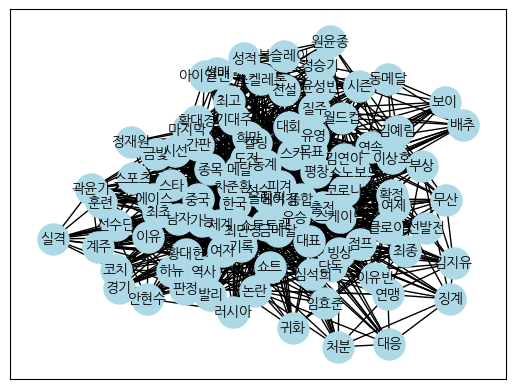

In [ ]:
pos = nx.spring_layout(G)  # Define the layout of the nodes
nx.draw_networkx(G, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=10, font_family='NanumGothic')

# Optionally, you can save the graph as an image:
# plt.savefig('co-occurrence_graph.png')

plt.show()

### 네트워크 군집화
Louvain 방식을 활용하여 community(군집)를 생성할 수 있습니다.</br>
아래 링크에서 Louvain의 원리를 살펴볼 수 있습니다.</br>
<<[네트워크이론] Louvain algorithm for community detection>>
https://mons1220.tistory.com/129

In [ ]:
from community import community_louvain

In [ ]:
partition = community_louvain.best_partition(G, resolution=0.9, random_state = 0) # resolution 값은 하이퍼 파라미터입니다. 적절하게 잘 조정하여 군집의 개수를 정해야 합니다.
print(partition)

# Create a colormap with unique colors for each community
num_communities = max(partition.values()) + 1
print(num_communities)

{'곽윤기': 2, '가능': 2, '경기': 2, '계주': 2, '금메달': 2, '귀화': 1, '금빛': 3, '기대주': 3, '간판': 0, '기록': 0, '김연아': 3, '김예림': 3, '남자': 0, '논란': 1, '단독': 2, '대응': 1, '대표': 1, '김지유': 1, '대회': 3, '도전': 3, '동계': 0, '동메달': 3, '러시아': 0, '마지막': 3, '메달': 3, '목표': 0, '무산': 1, '발리': 0, '배추': 3, '베이징': 3, '보이': 3, '봅슬레이': 3, '부상': 1, '빙상': 1, '선발전': 1, '선수': 0, '선수단': 2, '성적': 3, '세계': 0, '쇼트': 0, '쇼트트랙': 2, '스노보드': 3, '스케이팅': 0, '스켈레톤': 3, '스키': 0, '스타': 2, '스포츠': 0, '시선': 2, '시즌': 3, '실격': 2, '심석희': 1, '썰매': 0, '아이언맨': 3, '안현수': 2, '에이스': 2, '여자': 0, '여제': 2, '역사': 0, '연맹': 1, '연속': 3, '올림픽': 1, '우승': 0, '원윤종': 3, '월드컵': 3, '유영': 3, '윤성빈': 3, '이상호': 3, '이유': 2, '이유빈': 1, '임효준': 1, '전설': 3, '점프': 0, '정승기': 3, '정재원': 1, '종목': 0, '종합': 1, '중국': 2, '질주': 3, '징계': 1, '차준환': 0, '처분': 1, '최고': 3, '최민정': 2, '최종': 1, '최초': 0, '출전': 1, '컬링': 0, '코로나': 0, '코치': 2, '클로이': 2, '판정': 2, '평창': 2, '피겨': 0, '하뉴': 0, '한국': 2, '확대경': 0, '확정': 1, '황대헌': 2, '훈련': 2, '희망': 3}
4


In [ ]:
pos = nx.spring_layout(G)  # Define the layout of the nodes

# Assign a color to each node based on its community
node_colors = [partition[node] for node in G.nodes()]

<ipython-input-38-8605478eceb3>:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('tab20', num_communities)


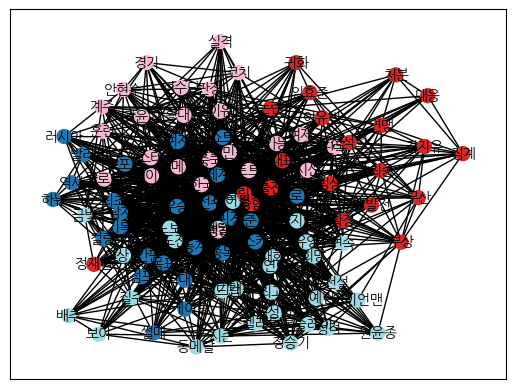

In [ ]:
cmap = plt.cm.get_cmap('tab20', num_communities)

nx.draw_networkx(G, pos, with_labels=True, node_color=node_colors, cmap=cmap, node_size=100, font_size=10, font_family = 'NanumGothic')

# Optionally, you can save the graph as an image:
# plt.savefig('community_graph.png')

plt.show()

In [ ]:
node_df['Partition'] = partition.values()
# 가나다 오름차순으로 정렬되어 있기 때문에 이렇게 실행해도 괜찮습니다. 만약 정렬이 흐트러질 경우 pd.merge 함수를 활용해야 합니다.

In [ ]:
node_df = node_df.sort_values('Partition'); node_df

,Id,Label,Partition
57,57,역사,0
79,79,차준환,0
38,38,세계,0
39,39,쇼트,0
55,55,여자,0
...,...,...,...
72,72,정승기,3
66,66,이상호,3
70,70,전설,3
28,28,배추,3


In [ ]:
node_df[node_df['Partition'] == 2]

,Id,Label,Partition
82,82,최민정,2
89,89,클로이,2
90,90,판정,2
67,67,이유,2
91,91,평창,2
76,76,중국,2
94,94,한국,2
97,97,황대헌,2
88,88,코치,2
0,0,가능,2


In [ ]:
word_dic = {}
for i , word in enumerate(names):
    word_dic[word] = i

In [ ]:
edge_df['Source'] = edge_df['Source'].map(lambda x: word_dic[x])
edge_df['Target'] = edge_df['Target'].map(lambda x: word_dic[x]); edge_df

,Source,Target,Weight
0,4,0,1.0
1,4,2,1.0
2,4,3,1.0
3,6,0,1.0
4,6,2,1.0
...,...,...,...
1404,99,72,3.0
1405,99,74,1.0
1406,99,82,1.0
1407,99,91,2.0


In [ ]:
cd /content

/content


In [ ]:
node_df

,Id,Label,Partition
57,57,역사,0
79,79,차준환,0
38,38,세계,0
39,39,쇼트,0
55,55,여자,0
...,...,...,...
72,72,정승기,3
66,66,이상호,3
70,70,전설,3
28,28,배추,3


In [ ]:
node_df.to_csv('2022 베이징 동계 올림픽 뉴스 기사 네트워크 node.csv', index = False)
edge_df.to_csv('2022 베이징 동계 올림픽 뉴스 기사 네트워크 edge.csv', index = False)

이렇게 추출된 네트워크 node와 edge를 활용하여 Gephi Network 시각화를 할 수 있습니다.</br>
자세한 사항은 유튜브 영상을 참고해주세요. </br>
<<Gephi에 데이터를 임포트하는 방법>>(영어) https://www.youtube.com/watch?v=FpOIbhOmGUs</br>
<br>
아래는 **최종 결과물입니다**.

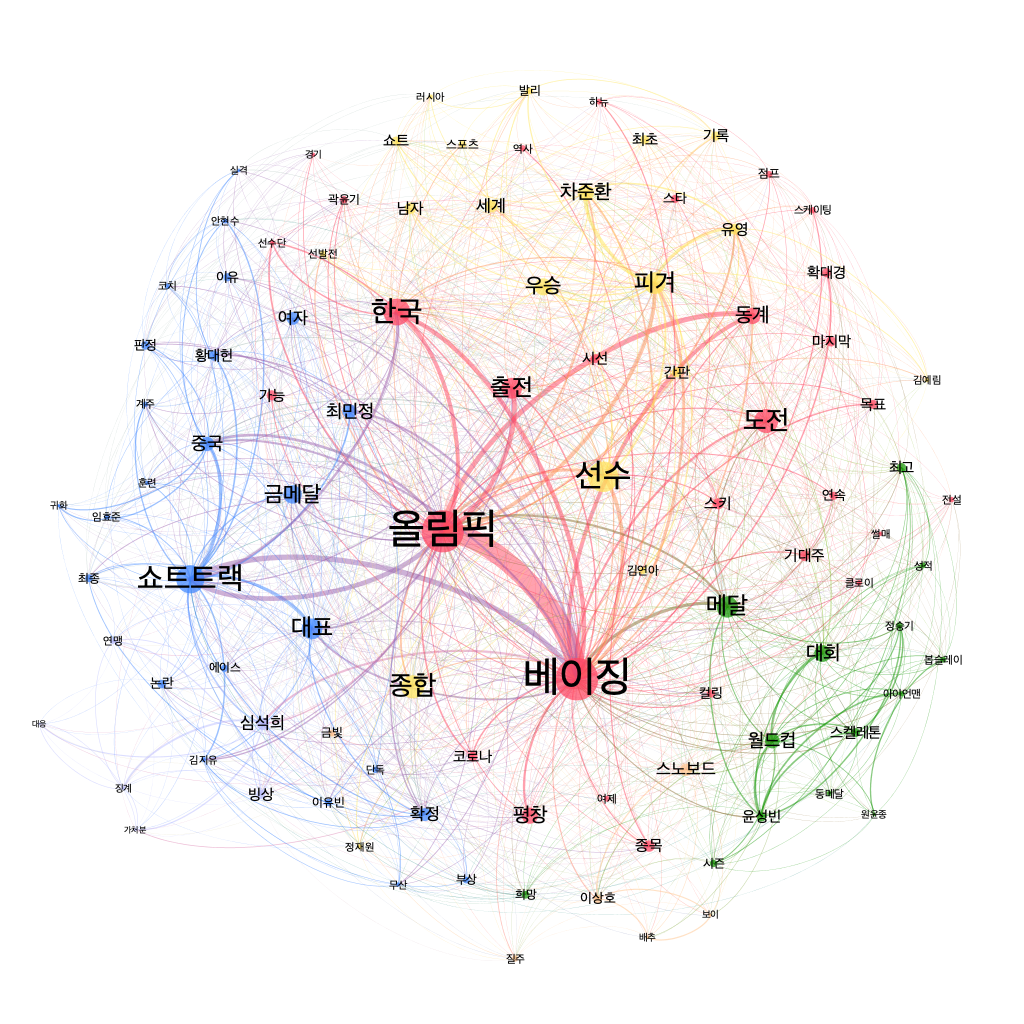